### The objective is to analyis the customer subscription. This model helps to predict which users will not subscribe to paid membership so that the marketing efforts can go trying to convert the users to paid users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('appdata10.csv')
df.head()

user        first_open  dayofweek       hour  age  \
0  235136  27-12-2012 02:14          3   02:00:00   23   
1  333588  02-12-2012 01:16          6   01:00:00   24   
2  254414  19-03-2013 19:19          1   19:00:00   23   
3  234192  05-07-2013 16:08          4   16:00:00   28   
4   51549  26-02-2013 18:50          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   liked  used_premium_feature  enrolled     enrolled_date  
0      0                     0         0               NaN  
1      0                     0         0               NaN  
2      1                     1         0               NaN  
3      0                     0         1  05-07-2013 16:11  
4      1                     0         1  26-02-2013 18:56

In [3]:
df.shape

(50000, 12)

In [4]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
liked                       0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
dtype: int64

### EDA

In [5]:
df.describe()

user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

              liked  used_premium_feature      enrolled  
count  50000.000000          50000.000000  50000.000000  
mean       0.165000              0.172020      0.621480  
std        0.371184              0.377402      0.485023  
min        0.000000              0.000000      0.000000  
25%        0.000000              0.000000      0.000000  
50%        0.000000              0.000000      1.000000  
75%        0.000000              0.000000      1.000000  
max        1.000000              1.000000      1.000000

On an average, age of users is around 32, screen visit is 21, 62% users have enrolled to premium.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   liked                 50000 non-null  int64 
 9   used_premium_feature  50000 non-null  int64 
 10  enrolled              50000 non-null  int64 
 11  enrolled_date         31074 non-null  object
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [7]:
# converting hour to integer form 
df['hour']=df.hour.str.slice(1,3).astype(int)

In [8]:
df.head()

user        first_open  dayofweek  hour  age  \
0  235136  27-12-2012 02:14          3     2   23   
1  333588  02-12-2012 01:16          6     1   24   
2  254414  19-03-2013 19:19          1    19   23   
3  234192  05-07-2013 16:08          4    16   28   
4   51549  26-02-2013 18:50          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   liked  used_premium_feature  enrolled     enrolled_date  
0      0                     0         0               NaN  
1      0                     0         0               NaN  
2      1                     1         0               NaN  
3      0                     0         1  05-07-2013 16:11  
4      1                     0         1  26-02-2013 18:56

In [9]:
df_num=df.copy().drop(columns=['screen_list','user','first_open','hour','enrolled_date','enrolled'])
df_num.head()

dayofweek  age  numscreens  minigame  liked  used_premium_feature
0          3   23          15         0      0                     0
1          6   24          13         0      0                     0
2          1   23           3         0      1                     1
3          4   28          40         0      0                     0
4          1   31          32         0      1                     0

In [10]:
df_num.shape

(50000, 6)

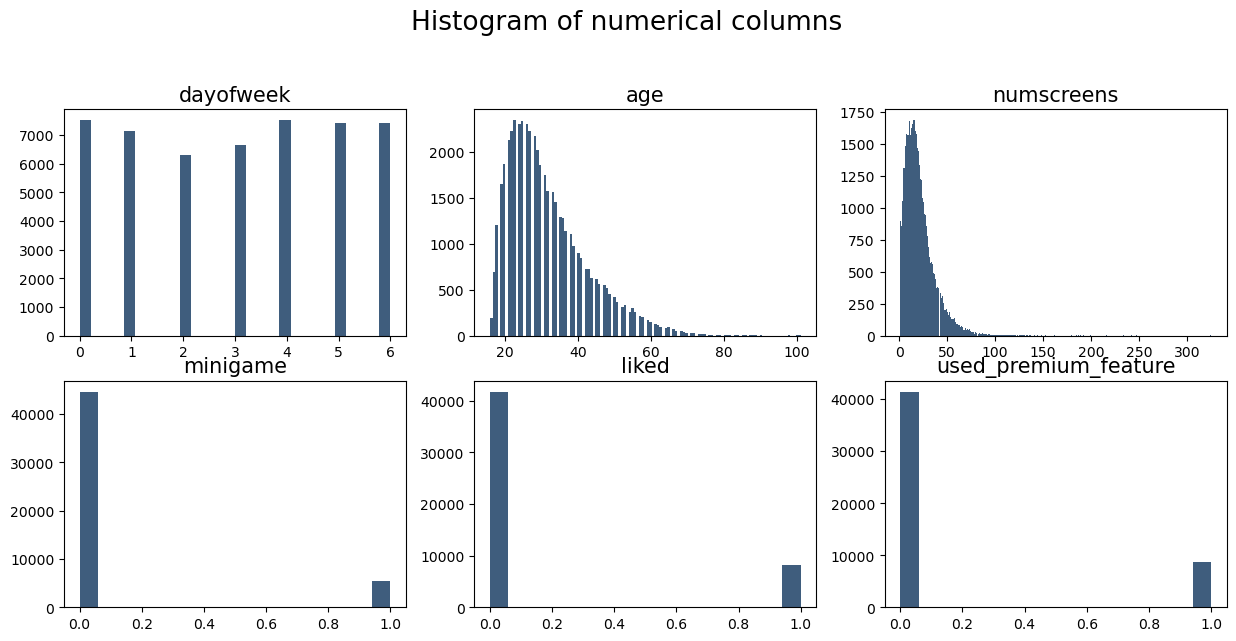

In [11]:
# histogram of all numerical values
plt.figure(figsize=(15,10))
plt.suptitle('Histogram of numerical columns',fontsize=19)

for i in range(1,df_num.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(df_num.columns.values[i-1],fontsize=15)
    data=df_num.iloc[:,i-1]
    plt.hist(data,bins='auto',color='#3F5D7D')

Days have not much effect on user <br>
Most users are in 25-35 age of group<br>
Screen visits of user are generally between 10-28 <br>
Most of the users haven't played the minigame <br>
Most of the users haven't liked <br>
Most of the users are not used the premium features <br>

In [12]:
df_num.corr(method='kendall')

dayofweek       age  numscreens  minigame     liked  \
dayofweek              1.000000 -0.008962    0.005796 -0.007570 -0.004933   
age                   -0.008962  1.000000   -0.090987  0.028071 -0.002269   
numscreens             0.005796 -0.090987    1.000000  0.034383 -0.003990   
minigame              -0.007570  0.028071    0.034383  1.000000 -0.012250   
liked                 -0.004933 -0.002269   -0.003990 -0.012250  1.000000   
used_premium_feature   0.001459  0.016075    0.064334  0.108780  0.001690   

                      used_premium_feature  
dayofweek                         0.001459  
age                               0.016075  
numscreens                        0.064334  
minigame                          0.108780  
liked                             0.001690  
used_premium_feature              1.000000

<AxesSubplot:title={'center':'Correlation with respose variable'}>

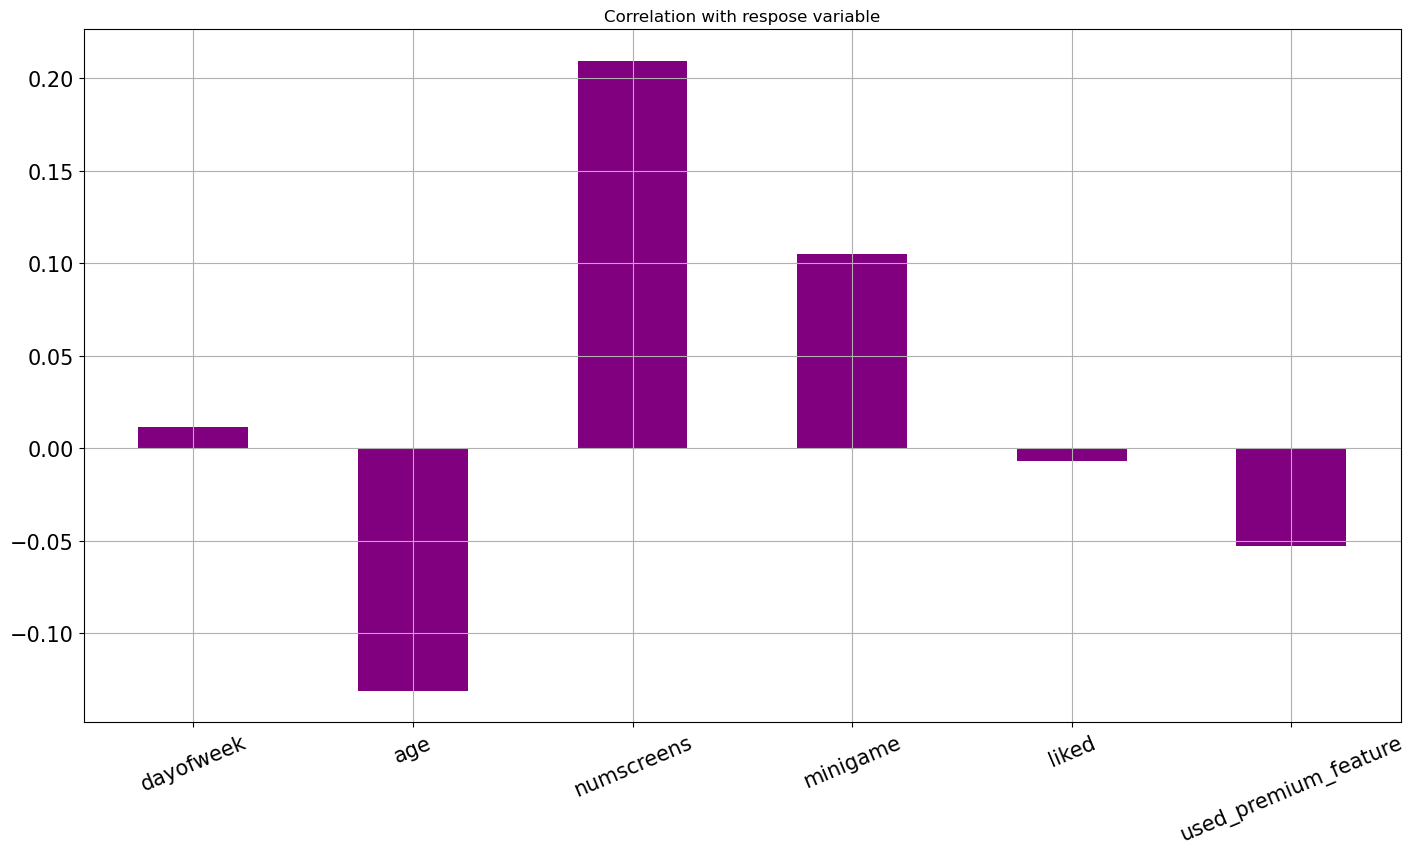

In [13]:
df_num.corrwith(df.enrolled).plot.bar(figsize=(17,9),title='Correlation with respose variable',fontsize=15,rot=23,grid=True,color='purple')

Days of week is the least positively correlated means it might not affect the number of enrolled users<br>
Younger users are most likely to enroll<br>
Numscreens is the most positively correlated means more the numscreens of users more is the chance of user to enroll<br>
Users who played minigame are likely to enroll
Liked is the least negatively correlated feature means it might not affect the number of users enrolled<br>
Interestingly, users who have used the premuim features on the first day are not likely to get enrolled.


<AxesSubplot:>

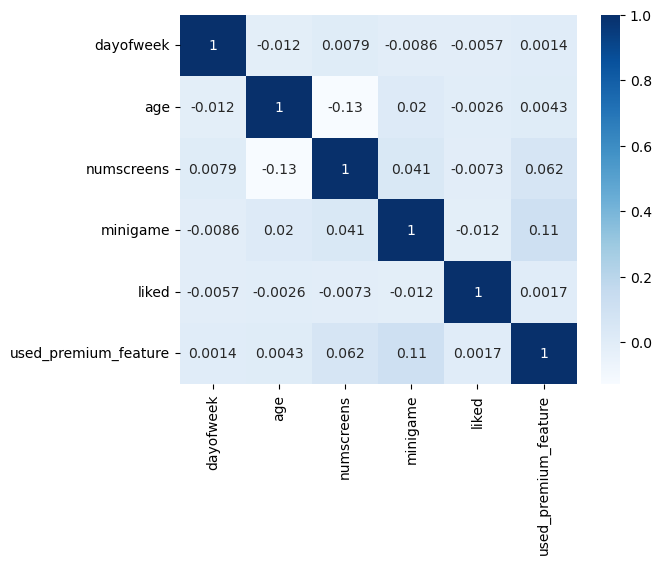

In [14]:
sns.heatmap(df_num.corr(),cmap='Blues',annot=True)

All the features have very less correlation with eachother so there is less chance of multicolinearity problems

### Feature Engineering

In [15]:
# converting first_open and enrolled_date to datetime
df['first_open']=pd.to_datetime(df['first_open'])
df['enrolled_date']=pd.to_datetime(df['enrolled_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            50000 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  int32         
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   liked                 50000 non-null  int64         
 9   used_premium_feature  50000 non-null  int64         
 10  enrolled              50000 non-null  int64         
 11  enrolled_date         31074 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


In [16]:
df.head()

user          first_open  dayofweek  hour  age  \
0  235136 2012-12-27 02:14:00          3     2   23   
1  333588 2012-02-12 01:16:00          6     1   24   
2  254414 2013-03-19 19:19:00          1    19   23   
3  234192 2013-05-07 16:08:00          4    16   28   
4   51549 2013-02-26 18:50:00          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   liked  used_premium_feature  enrolled       enrolled_date  
0      0                     0         0                 NaT  
1      0                     0         0                 NaT  
2      1                     1         0                 NaT  
3      0                     0         1 2013-05-07 16:11:00  
4      1                     0         1 2013-02-26 18:56:00

In [17]:
# creating new feature time_diff to store difference between first_open and enrolled_date
df['time_diff']=(df.first_open-df.enrolled_date).abs().astype('timedelta64[h]')  #as we want in hour
df.head()

user          first_open  dayofweek  hour  age  \
0  235136 2012-12-27 02:14:00          3     2   23   
1  333588 2012-02-12 01:16:00          6     1   24   
2  254414 2013-03-19 19:19:00          1    19   23   
3  234192 2013-05-07 16:08:00          4    16   28   
4   51549 2013-02-26 18:50:00          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   liked  used_premium_feature  enrolled       enrolled_date  time_diff  
0      0                     0         0                 NaT        NaN  
1      0                     0         0                 NaT        NaN  
2      1                     1         0                 NaT        NaN  
3      0                     0         1 2013-05-07 16:11:00        0.0  
4      1                     0         1 2013-02-26 18:56:00        0.0

In [18]:
df.time_diff[df.time_diff<0]

Series([], Name: time_diff, dtype: float64)

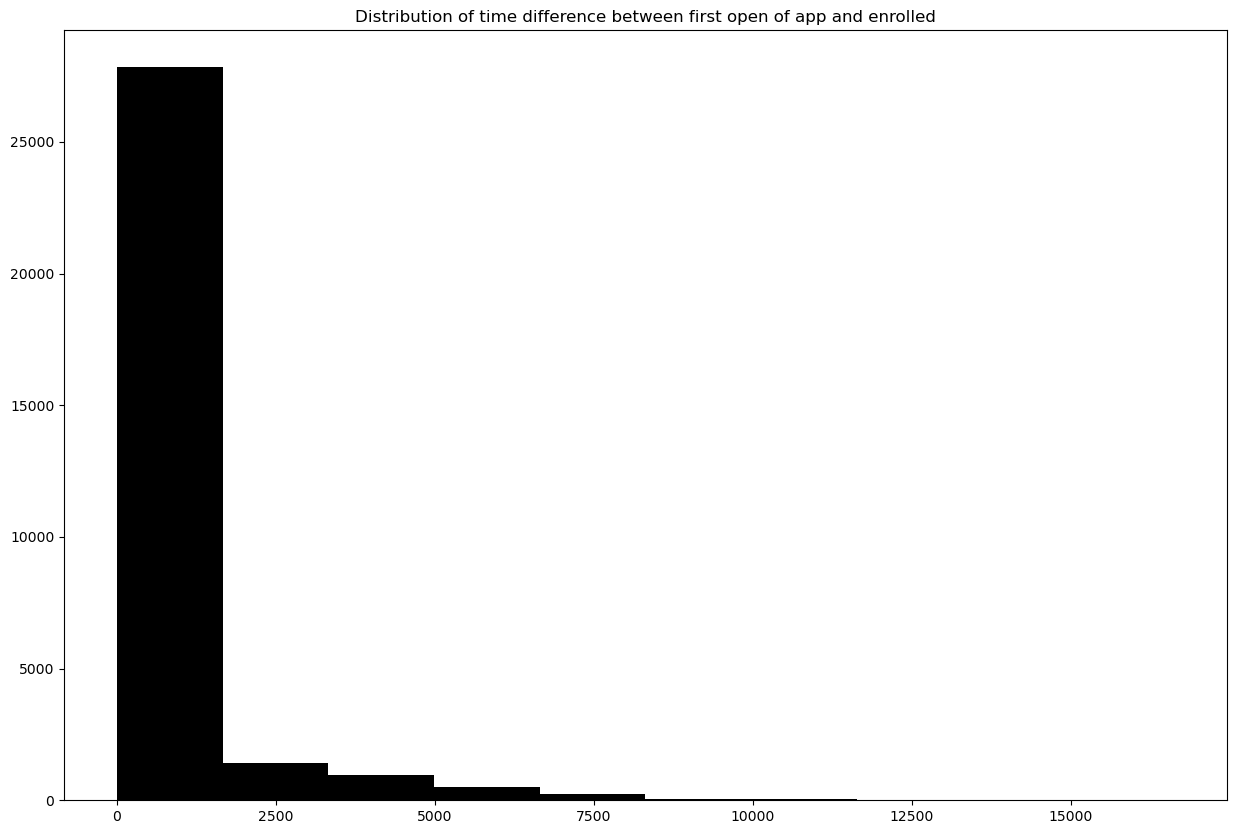

In [19]:
plt.figure(figsize=(15,10))
plt.hist(df.time_diff.dropna(),color='black')
plt.title('Distribution of time difference between first open of app and enrolled')
plt.show()

Most users enrolled to premium in the first 2500 hrs

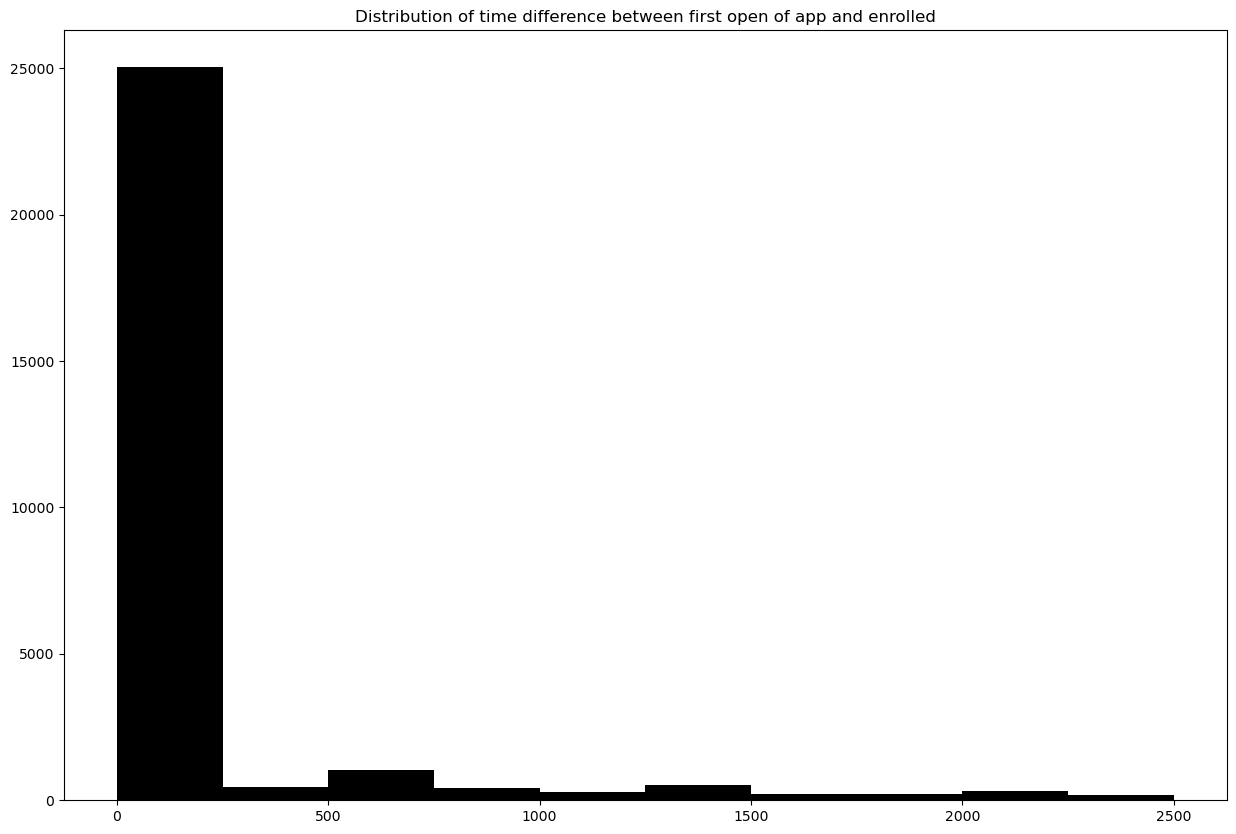

In [20]:
plt.figure(figsize=(15,10))
plt.hist(df.time_diff.dropna(),color='black',range=[0,2500])
plt.title('Distribution of time difference between first open of app and enrolled')
plt.show()

Zooming the graph more

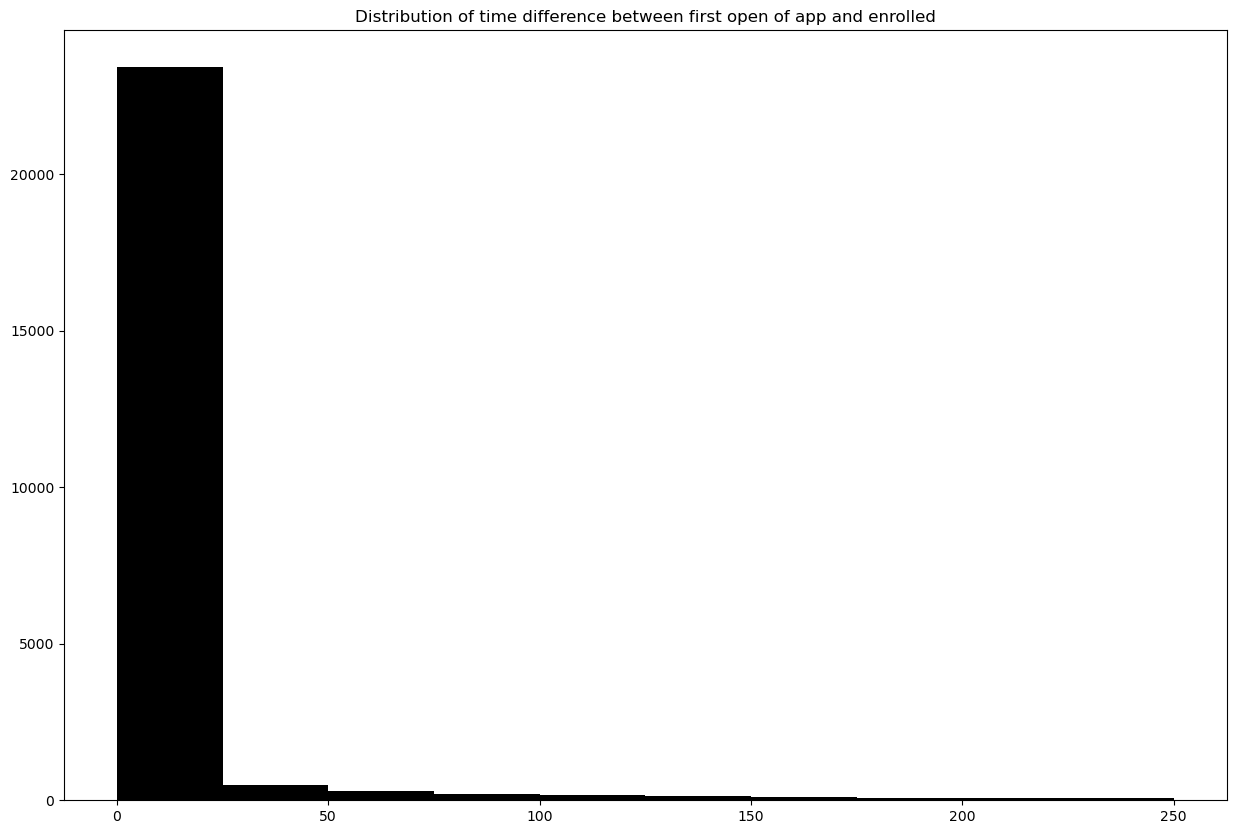

In [21]:
plt.figure(figsize=(15,10))
plt.hist(df.time_diff.dropna(),color='black',range=[0,250])
plt.title('Distribution of time difference between first open of app and enrolled')
plt.show()

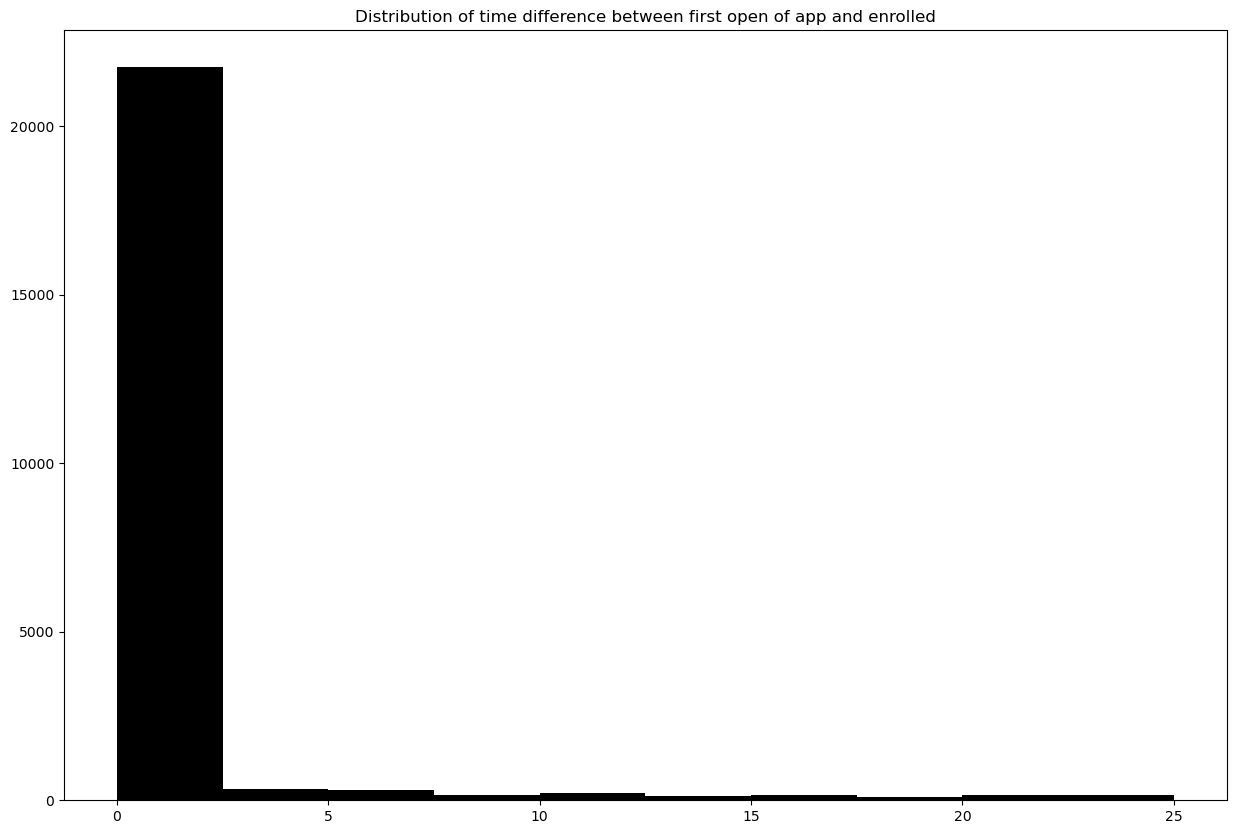

In [22]:
plt.figure(figsize=(15,10))
plt.hist(df.time_diff.dropna(),color='black',range=[0,25])
plt.title('Distribution of time difference between first open of app and enrolled')
plt.show()

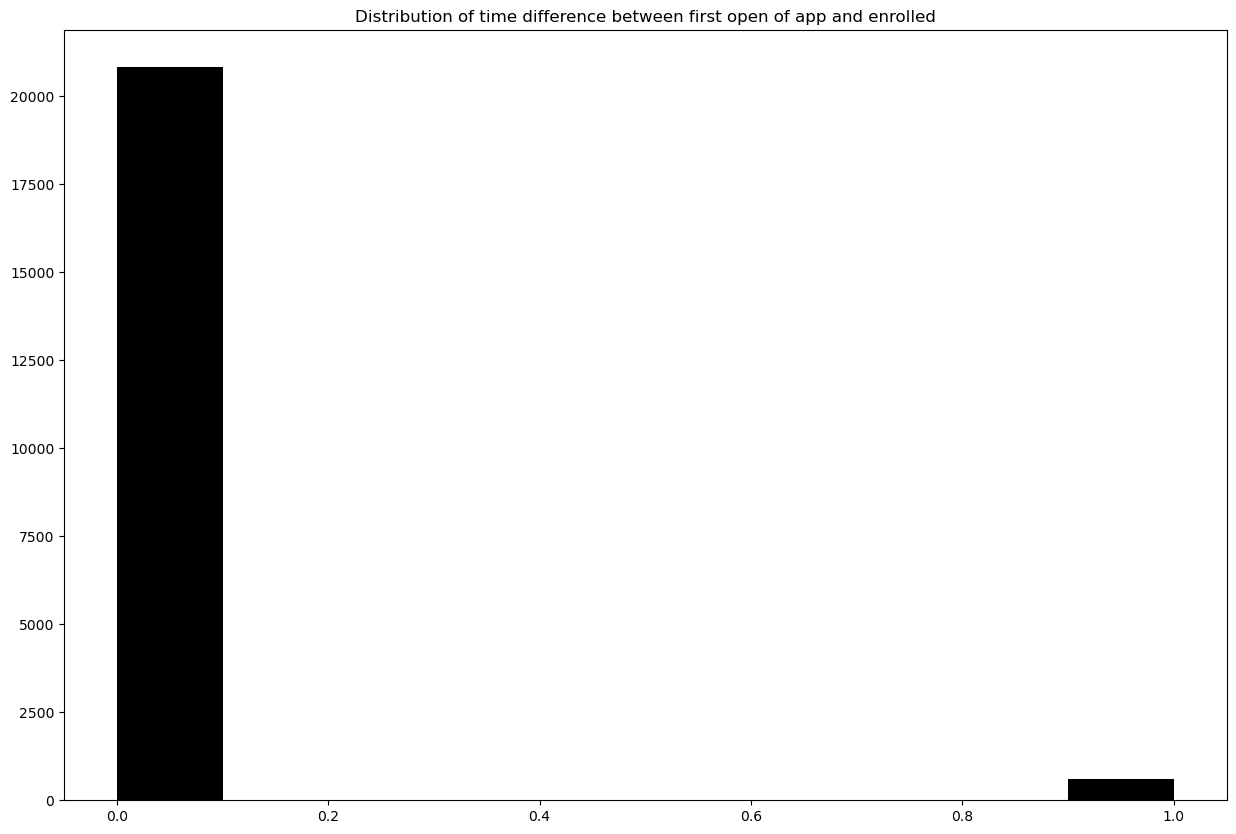

In [23]:
plt.figure(figsize=(15,10))
plt.hist(df.time_diff.dropna(),color='black',range=[0,1])
plt.title('Distribution of time difference between first open of app and enrolled')
plt.show()

Here we can conclude that most of the users haven't used to 1st 24 hr free-trial premium features but have directly enrolled for premium when they first open the app.

In [24]:
top_sc=pd.read_csv('top_screens.csv')
top_sc.head()


Unnamed: 0       top_screens
0           0             Loan2
1           1          location
2           2      Institutions
3           3  Credit3Container
4           4       VerifyPhone

In [25]:
top_sc=top_sc.top_screens.values

In [26]:
df['screen_list']=df.screen_list.astype(str)+','
df.head()

user          first_open  dayofweek  hour  age  \
0  235136 2012-12-27 02:14:00          3     2   23   
1  333588 2012-02-12 01:16:00          6     1   24   
2  254414 2013-03-19 19:19:00          1    19   23   
3  234192 2013-05-07 16:08:00          4    16   28   
4   51549 2013-02-26 18:50:00          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                 Splash,Cycle,Loan,           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   liked  used_premium_feature  enrolled       enrolled_date  time_diff  
0      0                     0         0                 NaT        NaN  
1      0                     0         0                 NaT        NaN  
2      1                     1         0                 NaT        NaN  
3      0                     0         1 2013-05-07 16:11:00        0.0  
4      1                     0         1 2013-02-26 18:56:00        0.0

In [27]:
for sc in top_sc:
    df[sc]=df.screen_list.str.contains(sc).astype(int)
    df['screen_list']=df.screen_list.replace(sc+',','')
    
df.head()

user          first_open  dayofweek  hour  age  \
0  235136 2012-12-27 02:14:00          3     2   23   
1  333588 2012-02-12 01:16:00          6     1   24   
2  254414 2013-03-19 19:19:00          1    19   23   
3  234192 2013-05-07 16:08:00          4    16   28   
4   51549 2013-02-26 18:50:00          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                 Splash,Cycle,Loan,           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   liked  used_premium_feature  ...  ProfileJobTitle Login  \
0      0                     0  ...                0     1   
1      0                     0  ...                0     0   
2      1                     1  ...                0     0   
3      0                     0  ...                0     0   
4      1                     0  ...                0     0   

   ProfileEmploymentLength  WebView  SecurityModal  Loan4  ResendToken  \
0                        0        0              0      0            0   
1                        0        0              0      0            0   
2                        0        0              0      0            0   
3                        0        0              0      0            0   
4                        0        0              0      0            0   

   TransactionList  NetworkFailure  ListPicker  
0                0               0           0  
1                0               0           0  
2                0               0           0  
3                0               0           0  
4                0               0           0  

[5 rows x 71 columns]

In [28]:
df['other_screens']=df.screen_list.str.count(',')
df.drop(columns=['screen_list'],inplace=True)

In [29]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'liked', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'time_diff', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'We

In [30]:
# Saving Screens
savings_screens = ['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']
df['SavingsCount'] = df[savings_screens].sum(axis=1)
# Droping all the columns under savings_screens
df.drop(columns=savings_screens,inplace=True)

# Credit Monitoring Screens
cm_screens = ['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
df['CMCount'] = df[cm_screens].sum(axis=1)
# Droping all the columns under cm_screens
df.drop(columns= cm_screens,inplace=True)

# Credit Card Screens
cc_screens = ['CC1','CC1Category','CC3']
df['CCCount'] = df[cc_screens].sum(axis=1)
# Droping all the columns under cc_screens
df.drop(columns= cc_screens,inplace=True)

# Loan Screens
loan_screens = ['Loan','Loan2','Loan3','Loan4']
df['LoanCount'] = df[loan_screens].sum(axis=1)
# Droping all the columns under loan_screens
df.drop(columns= loan_screens,inplace=True)

In [31]:
df.head()

user          first_open  dayofweek  hour  age  numscreens  minigame  \
0  235136 2012-12-27 02:14:00          3     2   23          15         0   
1  333588 2012-02-12 01:16:00          6     1   24          13         0   
2  254414 2013-03-19 19:19:00          1    19   23           3         0   
3  234192 2013-05-07 16:08:00          4    16   28          40         0   
4   51549 2013-02-26 18:50:00          1    18   31          32         0   

   liked  used_premium_feature  enrolled  ... SecurityModal  ResendToken  \
0      0                     0         0  ...             0            0   
1      0                     0         0  ...             0            0   
2      1                     1         0  ...             0            0   
3      0                     0         1  ...             0            0   
4      1                     0         1  ...             0            0   

   TransactionList  NetworkFailure  ListPicker  other_screens  SavingsCount  \
0                0               0           0             13             0   
1                0               0           0             11             0   
2                0               0           0              3             0   
3                0               0           0             17             0   
4                0               0           0             19             0   

   CMCount  CCCount  LoanCount  
0        0        0          2  
1        0        0          2  
2        0        0          1  
3        3        0          2  
4        3        0          2  

[5 rows x 53 columns]

In [32]:
df.describe()

user     dayofweek          hour          age    numscreens  \
count   50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean   186889.729900      3.029860     12.557220     31.72436     21.095900   
std    107768.520361      2.031997      7.438072     10.80331     15.728812   
min        13.000000      0.000000      0.000000     16.00000      1.000000   
25%     93526.750000      1.000000      5.000000     24.00000     10.000000   
50%    187193.500000      3.000000     14.000000     29.00000     18.000000   
75%    279984.250000      5.000000     19.000000     37.00000     28.000000   
max    373662.000000      6.000000     23.000000    101.00000    325.000000   

           minigame         liked  used_premium_feature      enrolled  \
count  50000.000000  50000.000000          50000.000000  50000.000000   
mean       0.107820      0.165000              0.172020      0.621480   
std        0.310156      0.371184              0.377402      0.485023   
min        0.000000      0.000000              0.000000      0.000000   
25%        0.000000      0.000000              0.000000      0.000000   
50%        0.000000      0.000000              0.000000      1.000000   
75%        0.000000      0.000000              0.000000      1.000000   
max        1.000000      1.000000              1.000000      1.000000   

          time_diff  ...  SecurityModal   ResendToken  TransactionList  \
count  31074.000000  ...   50000.000000  50000.000000     50000.000000   
mean     507.055126  ...       0.014220      0.013340         0.013400   
std     1403.009447  ...       0.118398      0.114727         0.114981   
min        0.000000  ...       0.000000      0.000000         0.000000   
25%        0.000000  ...       0.000000      0.000000         0.000000   
50%        0.000000  ...       0.000000      0.000000         0.000000   
75%       23.000000  ...       0.000000      0.000000         0.000000   
max    16620.000000  ...       1.000000      1.000000         1.000000   

       NetworkFailure    ListPicker  other_screens  SavingsCount  \
count    50000.000000  50000.000000    50000.00000  50000.000000   
mean         0.008200      0.007580       12.97544      0.365020   
std          0.090183      0.086733        7.11012      1.405511   
min          0.000000      0.000000        0.00000      0.000000   
25%          0.000000      0.000000        8.00000      0.000000   
50%          0.000000      0.000000       12.00000      0.000000   
75%          0.000000      0.000000       17.00000      0.000000   
max          1.000000      1.000000       79.00000     10.000000   

            CMCount       CCCount     LoanCount  
count  50000.000000  50000.000000  50000.000000  
mean       1.291220      0.178940      1.319660  
std        1.582347      0.618877      0.965845  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      2.000000  
75%        2.000000      0.000000      2.000000  
max        5.000000      3.000000      3.000000  

[8 rows x 51 columns]

In [33]:
df.columns #relatively less columns to work with

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'liked', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'time_diff', 'location', 'Institutions', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Splash', 'RewardsContainer', 'EditProfile',
       'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor',
       'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure',
       'ListPicker', 'other_screens', 'SavingsCount', 'CMCount', 'CCCount',
       'LoanCount'],
      dtype='object')

In [34]:
df.isnull().sum()

user                           0
first_open                     0
dayofweek                      0
hour                           0
age                            0
numscreens                     0
minigame                       0
liked                          0
used_premium_feature           0
enrolled                       0
enrolled_date              18926
time_diff                  18926
location                       0
Institutions                   0
VerifyPhone                    0
BankVerification               0
VerifyDateOfBirth              0
ProfilePage                    0
VerifyCountry                  0
Cycle                          0
idscreen                       0
Splash                         0
RewardsContainer               0
EditProfile                    0
Finances                       0
Alerts                         0
Leaderboard                    0
VerifyMobile                   0
VerifyHousing                  0
RewardDetail                   0
VerifyHous

### Model Forming

In [35]:
df.drop(columns=['first_open','enrolled_date','time_diff'],inplace=True) #we can't standardise datetime

In [36]:
enrolled=df['enrolled']
df.drop(columns=['enrolled'],inplace=True)


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,enrolled,test_size=0.2)

In [38]:
X_train.shape,y_train.shape

((40000, 49), (40000,))

In [39]:
X_test.shape,y_test.shape

((10000, 49), (10000,))

In [40]:
# No need to use user_id in model
train_id=X_train['user']
X_train.drop(columns=['user'],inplace=True)

test_id=X_test['user']
X_test.drop(columns=['user'],inplace=True)

In [41]:
# using standardscaler to avoid domainance of any feature in the model
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train),columns=df.columns[1:])
X_test = pd.DataFrame(sc_X.transform(X_test),columns=df.columns[1:])

In [42]:
X_train.head(2)

dayofweek      hour       age  numscreens  minigame     liked  \
0   0.479658  1.267597 -0.345955    1.071705 -0.346468 -0.444205   
1   0.972360  0.730361 -0.993654   -0.201955 -0.346468 -0.444205   

   used_premium_feature  location  Institutions  VerifyPhone  ...  \
0             -0.455293  0.963419     -0.644226     0.950665  ...   
1             -0.455293 -1.037970      1.552249    -1.051895  ...   

   SecurityModal  ResendToken  TransactionList  NetworkFailure  ListPicker  \
0      -0.117748    -0.116652          -0.1161       -0.092177   -0.086343   
1      -0.117748    -0.116652          -0.1161       -0.092177   -0.086343   

   other_screens  SavingsCount   CMCount   CCCount  LoanCount  
0       0.559098     -0.260992  2.337162 -0.290479   0.703282  
1      -0.422157     -0.260992 -0.817222 -0.290479   0.703282  

[2 rows x 48 columns]

In [43]:
X_test.head(2)

dayofweek      hour       age  numscreens  minigame     liked  \
0  -1.491150  0.998979 -0.068369   -0.584053 -0.346468 -0.444205   
1  -0.998448 -1.149963 -0.623540   -0.010906 -0.346468 -0.444205   

   used_premium_feature  location  Institutions  VerifyPhone  ...  \
0             -0.455293  0.963419     -0.644226     0.950665  ...   
1             -0.455293 -1.037970     -0.644226     0.950665  ...   

   SecurityModal  ResendToken  TransactionList  NetworkFailure  ListPicker  \
0      -0.117748    -0.116652          -0.1161       -0.092177   -0.086343   
1      -0.117748    -0.116652          -0.1161       -0.092177   -0.086343   

   other_screens  SavingsCount   CMCount   CCCount  LoanCount  
0      -0.141798     -0.260992 -0.186345 -0.290479   0.703282  
1      -0.001619     -0.260992 -0.817222 -0.290479  -1.366945  

[2 rows x 48 columns]

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.model_selection import GridSearchCV
params={'C':[100,10,1,0.1,0.01,0.001],'penalty':['l1','l2']}
model=GridSearchCV(lr,param_grid=params)
model.fit(X_train,y_train)

C:\Users\OWNER'S\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\OWNER'S\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OWNER'S\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\OWNER'S\AppData\Roaming\Python\Python39\site-packages\sklearn\l

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2']})

In [47]:
model.best_params_

{'C': 100, 'penalty': 'l2'}

In [49]:
lr_model=LogisticRegression(C=100,penalty='l2')
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)

<AxesSubplot:>

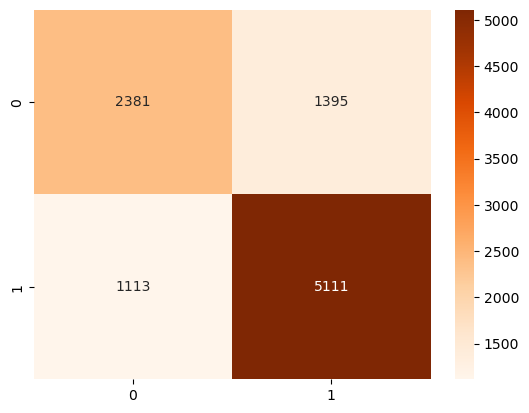

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges')  #fmt=format of string on annotations

<AxesSubplot:>

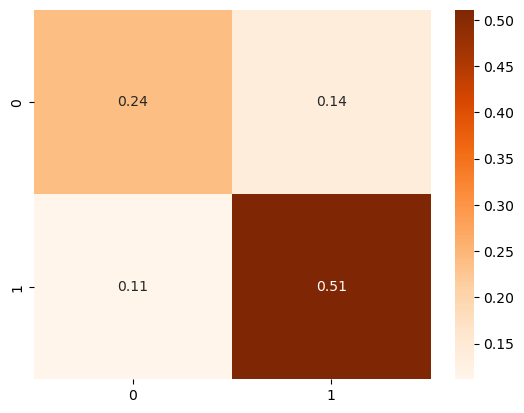

In [60]:
sns.heatmap(cm/cm.sum(),annot=True,cmap='Oranges')

In [83]:
accuracy_score(y_test,y_pred)

0.7492

### Feature Importance

In [72]:
lr_model.coef_[0] #weights

array([ 0.0148801 , -0.06519188, -0.09412099, -0.14425008,  0.28683275,
        0.00260847, -0.12182005, -0.30113408, -0.12302311,  0.47347948,
       -0.03206517, -0.04210034, -0.20391132, -0.43977802, -0.06030589,
        0.06324931, -0.18938102,  0.00883558, -0.0400382 , -0.1423305 ,
       -0.2818742 , -0.07416562,  0.34038627, -0.00386918, -0.04543044,
       -0.0024426 , -0.18769538,  0.        , -0.06138188, -0.04942204,
       -0.11094943, -0.13708173,  0.01917202, -0.10160006, -0.02501812,
       -0.15194315, -0.06664442, -0.25410834, -0.03231205, -0.12883233,
       -0.07778773,  0.01174076, -0.06675675,  1.93062495, -0.29679539,
        0.09424249, -0.13069245, -0.45772664])

In [73]:
weights=pd.Series(lr_model.coef_[0],index=X_train.columns.values)
weights=weights.sort_values(ascending=False)
weights

other_screens              1.930625
VerifyPhone                0.473479
VerifyMobile               0.340386
minigame                   0.286833
CMCount                    0.094242
idscreen                   0.063249
VerifyAnnualIncome         0.019172
dayofweek                  0.014880
NetworkFailure             0.011741
RewardsContainer           0.008836
liked                      0.002608
ProfileChildren            0.000000
VerifyHousingAmount       -0.002443
VerifyHousing             -0.003869
ProfileJobTitle           -0.025018
BankVerification          -0.032065
SecurityModal             -0.032312
EditProfile               -0.040038
VerifyDateOfBirth         -0.042100
RewardDetail              -0.045430
ProfileEducationMajor     -0.049422
Cycle                     -0.060306
ProfileEducation          -0.061382
hour                      -0.065192
ProfileEmploymentLength   -0.066644
ListPicker                -0.066757
Leaderboard               -0.074166
TransactionList           -0

In [82]:
feature_imp=pd.DataFrame(weights).reset_index()
feature_imp.set_axis(['features','weight'],axis='columns',inplace=True)
feature_imp.sort_values(ascending=False,by=['weight'])
feature_imp

features    weight
0             other_screens  1.930625
1               VerifyPhone  0.473479
2              VerifyMobile  0.340386
3                  minigame  0.286833
4                   CMCount  0.094242
5                  idscreen  0.063249
6        VerifyAnnualIncome  0.019172
7                 dayofweek  0.014880
8            NetworkFailure  0.011741
9          RewardsContainer  0.008836
10                    liked  0.002608
11         ProfileChildren   0.000000
12      VerifyHousingAmount -0.002443
13            VerifyHousing -0.003869
14          ProfileJobTitle -0.025018
15         BankVerification -0.032065
16            SecurityModal -0.032312
17              EditProfile -0.040038
18        VerifyDateOfBirth -0.042100
19             RewardDetail -0.045430
20    ProfileEducationMajor -0.049422
21                    Cycle -0.060306
22         ProfileEducation -0.061382
23                     hour -0.065192
24  ProfileEmploymentLength -0.066644
25               ListPicker -0.066757
26              Leaderboard -0.074166
27          TransactionList -0.077788
28                      age -0.094121
29         VerifyIncomeType -0.101600
30                  Rewards -0.110949
31     used_premium_feature -0.121820
32             Institutions -0.123023
33              ResendToken -0.128832
34                  CCCount -0.130692
35              AccountView -0.137082
36                 Finances -0.142330
37               numscreens -0.144250
38                    Login -0.151943
39     ProfileMaritalStatus -0.187695
40                   Splash -0.189381
41              ProfilePage -0.203911
42                  WebView -0.254108
43                   Alerts -0.281874
44             SavingsCount -0.296795
45                 location -0.301134
46            VerifyCountry -0.439778
47                LoanCount -0.457727

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

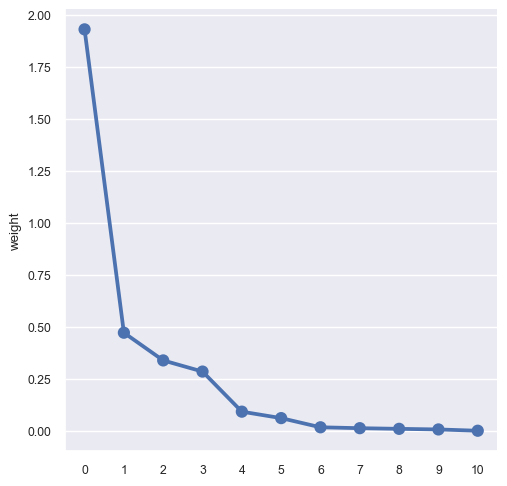

In [115]:
pos_weights=feature_imp[feature_imp['weight']>0]
my_plot=sns.factorplot(data=pos_weights,y='weight',x=pos_weights.index,figsize=(15,10))

### Conclusion and Results: 
- **Positively Affecting features to enrollment:** Other_sceens, VerifyPhone, CMCount, VerifyMobile, VerifyDateOfBirth, Rewards, EditProfile, etc, without any doubt all above features are situated to moving towards the enrollment screens.
- **Negatively Affecting features to enrollment:** LoanCount, VerifyCountry, Alerts, age, numscreens, Login, ResendToken, etc, if we see all these features are irritating & no user want to do this.


In [116]:
final_results=pd.concat([test_id,y_test],axis=1).dropna()

In [118]:
final_results['predicted']=y_pred

In [120]:
final_results.head()

user  enrolled  predicted
32149  321416         1          1
24864  204509         1          1
35871   75340         0          0
26585  267549         1          1
32435  228967         1          1